In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# for feature engineering
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

# for importing algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [145]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape,test.shape

((891, 12), (418, 11))

In [146]:
filenames=['train.csv','test.csv']
li = []

for filename in filenames:
    data = pd.read_csv(filename, index_col=None, header=0)
    li.append(data)

data= pd.concat(li, axis=0, ignore_index=True, sort=False)

In [147]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [148]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [149]:
for var in data.columns:
    if(data[var].isnull().sum()>0):
        print(var,data[var].isnull().sum())

Survived 418
Age 263
Fare 1
Cabin 1014
Embarked 2


In [150]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin','Ticket']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(discrete)
print(continuous)
print(categorical)
print(mixed)

['Pclass', 'SibSp', 'Parch']
['PassengerId', 'Age', 'Fare']
['Name', 'Sex', 'Embarked']
['Cabin', 'Ticket']


# Engineer mixed vairables

In [151]:
# Cabin
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter
data.drop('Cabin',axis=1,inplace=True)

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_num,Cabin_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,85.0,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,123.0,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN


In [152]:
# Ticket
data['Ticket_num'] = data['Ticket'].str.extract('(\d+)') # captures numerical part
data['Ticket_num'] = data['Ticket_num'].astype('float')
data['Ticket_cat'] = data['Ticket'].str.extract('([a-zA-Z]+)') # captures the first letter
data.drop('Ticket',axis=1,inplace=True)

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Ticket_num,Ticket_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,NaN,NaN,5.0,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,85.0,C,17599.0,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,NaN,NaN,2.0,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,123.0,C,113803.0,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,NaN,NaN,373450.0,NaN


In [153]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data.drop('Name',axis=1,inplace=True)

In [154]:
data['Title'].nunique()

18

In [155]:
data.drop('PassengerId',axis=1,inplace=True)

## Check again types of variables

In [156]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(discrete)
print(continuous)
print(categorical)
print(mixed)

['Pclass', 'SibSp', 'Parch']
['Age', 'Fare', 'Cabin_num', 'Ticket_num']
['Sex', 'Embarked', 'Cabin_cat', 'Ticket_cat', 'Title']
['Cabin', 'Ticket']


In [157]:
data_train=data.loc[:890,:]
data_test=data.loc[891:,:]
data_test.drop('Survived',axis=1,inplace=True)

C:\Users\Akshay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [158]:
for var in data_train.columns:
    if(data_train[var].isnull().sum()>0):
        print(var,data_train[var].isnull().sum())

Age 177
Embarked 2
Cabin_num 691
Cabin_cat 687
Ticket_num 4
Ticket_cat 661


In [159]:
for var in data_test.columns:
    if(data_test[var].isnull().sum()>0):
        print(var,data_test[var].isnull().sum())

Age 86
Fare 1
Cabin_num 329
Cabin_cat 327
Ticket_cat 296


In [160]:
data['Fare']=data['Fare'].fillna(-1)
data['Ticket_num']=data['Ticket_num'].fillna(-1)

In [161]:
data_train.select_dtypes(include='O')

,Sex,Embarked,Cabin_cat,Ticket_cat,Title
0,male,S,NaN,A,Mr
1,female,C,C,PC,Mrs
2,female,S,NaN,STON,Miss
3,female,S,C,NaN,Mrs
4,male,S,NaN,NaN,Mr
...,...,...,...,...,...
886,male,S,NaN,NaN,Rev
887,female,S,B,NaN,Miss
888,female,S,NaN,W,Miss
889,male,C,C,NaN,Mr


In [162]:
data[categorical].astype('O')

,Sex,Embarked,Cabin_cat,Ticket_cat,Title
0,male,S,NaN,A,Mr
1,female,C,C,PC,Mrs
2,female,S,NaN,STON,Miss
3,female,S,C,NaN,Mrs
4,male,S,NaN,NaN,Mr
...,...,...,...,...,...
1304,male,S,NaN,A,Mr
1305,female,C,C,PC,Dona
1306,male,S,NaN,SOTON,Mr
1307,male,S,NaN,NaN,Mr


### Split the data into train and test

In [163]:
# separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop('Survived', axis=1),  # predictors
    data_train['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 12), (90, 12))

## Titanic data pipeline

In [164]:
titanic_pipe = Pipeline([

    # missing data imputation - section 4
    ('imputer_num',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=continuous+discrete)),
    ('imputer_cat',
     mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding - section 6
    ('encoder_rare_label',
     ce.RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=5,
                                    variables=categorical)),
    ('categorical_encoder',
     ce.OrdinalCategoricalEncoder(encoding_method='ordered',
                                  variables=categorical)),
])

In [165]:
titanic_pipe.fit(X_train, y_train)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\feature_engine\categorical_encoders.py:719: UserWarning: The number of unique categories for variable Sex is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))
C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\feature_engine\categorical_encoders.py:719: UserWarning: The number of unique categories for variable Embarked is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "n_categories. Thus, all categories will be considered frequent".format(var))


Pipeline(steps=[('imputer_num',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Age', 'Fare', 'Cabin_num',
                                                   'Ticket_num', 'Pclass',
                                                   'SibSp', 'Parch'])),
                ('imputer_cat',
                 CategoricalVariableImputer(variables=['Sex', 'Embarked',
                                                       'Cabin_cat',
                                                       'Ticket_cat',
                                                       'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=5, tol=0.01,
                                             variables=['Sex', 'Embarked',
                                                        'Cabin_cat',
                                                        'Ticket_cat',
                                               

In [166]:
X_train_preds = titanic_pipe.transform(X_train)
X_test_preds  = titanic_pipe.transform(X_test)
test_preds    = titanic_pipe.transform(data_test)

# Feature Scaling

In [167]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [168]:
X_train = pd.DataFrame(scaler_x.fit_transform(X_train_preds),columns=X_train.columns)
X_test = pd.DataFrame(scaler_x.fit_transform(X_test_preds),columns=X_test.columns)
test_f = pd.DataFrame(scaler_x.fit_transform(X_test_preds),columns=test_preds.columns)

# Prediction

In [169]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Logistic")
print("train:",lr.score(X_train,y_train))
print("test:",lr.score(X_test,y_test))
print()

svc = SVC()
svc.fit(X_train, y_train)
X_train_preds = svc.predict(X_train)
X_test_preds = svc.predict(X_test)

print("SVM")
print("train:",svc.score(X_train,y_train))
print("test:",svc.score(X_test,y_test))
print()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("RF")
print("train:",rf.score(X_train,y_train))
print("test:",rf.score(X_test,y_test))
print()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("KNN")
print("train:",knn.score(X_train,y_train))
print("test:",knn.score(X_test,y_test))
print()

adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

print("AdaBoost")
print("train:",adb.score(X_train,y_train))
print("test:",adb.score(X_test,y_test))
print()


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print("XGBoost")
print("train:",xgb.score(X_train,y_train))
print("test:",xgb.score(X_test,y_test))
print()

Logistic
train: 0.8177278401997503
test: 0.8333333333333334

SVM
train: 0.8601747815230961
test: 0.8222222222222222

RF
train: 0.9975031210986267
test: 0.8333333333333334

KNN
train: 0.8714107365792759
test: 0.8666666666666667

AdaBoost
train: 0.8564294631710362
test: 0.7555555555555555

XGBoost
train: 0.8963795255930087
test: 0.7777777777777778



In [170]:
X_train.shape

(801, 12)

## Neural Network

In [171]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu', input_dim = 12))

classifier.add(Dense(output_dim = 7, init = 'uniform', activation = 'relu'))

classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train.values, y_train.values, batch_size = 10, nb_epoch = 500)

C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=7, kernel_initializer="uniform")`
  import sys
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/500
801/801 [==============================] - 1s 880us/step - loss: 0.6875 - accuracy: 0.6217
Epoch 2/500
801/801 [==============================] - 0s 238us/step - loss: 0.6224 - accuracy: 0.6217
Epoch 3/500
801/801 [==============================] - 0s 236us/step - loss: 0.5320 - accuracy: 0.7054
Epoch 4/500
801/801 [==============================] - 0s 232us/step - loss: 0.5121 - accuracy: 0.8152
Epoch 5/500
801/801 [==============================] - 0s 239us/step - loss: 0.4940 - accuracy: 0.8002
Epoch 6/500
801/801 [==============================] - 0s 275us/step - loss: 0.4774 - accuracy: 0.8040
Epoch 7/500
801/801 [==============================] - 0s 439us/step - loss: 0.4643 - accuracy: 0.7878
Epoch 8/500
801/801 [==============================] - 0s 491us/step - loss: 0.4551 - accuracy: 0.7853
Epoch 9/500
801/801 [==============================] - 0s 484us/step - loss: 0.4455 - accuracy: 0.7965
Epoch 10/500
801/801 [==============================] - 0s 485us/step - l

801/801 [==============================] - 0s 495us/step - loss: 0.3607 - accuracy: 0.8627
Epoch 157/500
801/801 [==============================] - 0s 478us/step - loss: 0.3607 - accuracy: 0.8602
Epoch 158/500
801/801 [==============================] - 0s 477us/step - loss: 0.3602 - accuracy: 0.8627
Epoch 159/500
801/801 [==============================] - 0s 481us/step - loss: 0.3609 - accuracy: 0.8614
Epoch 160/500
801/801 [==============================] - 0s 485us/step - loss: 0.3603 - accuracy: 0.86140s - loss: 0.3696 - accu
Epoch 161/500
801/801 [==============================] - 0s 483us/step - loss: 0.3598 - accuracy: 0.8639
Epoch 162/500
801/801 [==============================] - 0s 491us/step - loss: 0.3602 - accuracy: 0.8602
Epoch 163/500
801/801 [==============================] - 0s 490us/step - loss: 0.3601 - accuracy: 0.8577
Epoch 164/500
801/801 [==============================] - 0s 544us/step - loss: 0.3593 - accuracy: 0.8602
Epoch 165/500
801/801 [======================

801/801 [==============================] - 0s 492us/step - loss: 0.3413 - accuracy: 0.8652
Epoch 310/500
801/801 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.85 - 0s 489us/step - loss: 0.3412 - accuracy: 0.8627
Epoch 311/500
801/801 [==============================] - 0s 485us/step - loss: 0.3414 - accuracy: 0.8652
Epoch 312/500
801/801 [==============================] - 0s 472us/step - loss: 0.3409 - accuracy: 0.8639
Epoch 313/500
801/801 [==============================] - 0s 476us/step - loss: 0.3416 - accuracy: 0.8677
Epoch 314/500
801/801 [==============================] - 0s 482us/step - loss: 0.3407 - accuracy: 0.8639
Epoch 315/500
801/801 [==============================] - 0s 478us/step - loss: 0.3405 - accuracy: 0.8627
Epoch 316/500
801/801 [==============================] - 0s 489us/step - loss: 0.3414 - accuracy: 0.8639
Epoch 317/500
801/801 [==============================] - 0s 478us/step - loss: 0.3409 - accuracy: 0.8639
Epoch 318/500
801/801 [====

801/801 [==============================] - 0s 483us/step - loss: 0.3365 - accuracy: 0.8652
Epoch 462/500
801/801 [==============================] - 0s 480us/step - loss: 0.3378 - accuracy: 0.8589
Epoch 463/500
801/801 [==============================] - 0s 491us/step - loss: 0.3397 - accuracy: 0.8602
Epoch 464/500
801/801 [==============================] - 0s 482us/step - loss: 0.3367 - accuracy: 0.8602
Epoch 465/500
801/801 [==============================] - 0s 477us/step - loss: 0.3354 - accuracy: 0.8602
Epoch 466/500
801/801 [==============================] - 0s 490us/step - loss: 0.3369 - accuracy: 0.8652
Epoch 467/500
801/801 [==============================] - 0s 473us/step - loss: 0.3372 - accuracy: 0.8614
Epoch 468/500
801/801 [==============================] - 0s 479us/step - loss: 0.3357 - accuracy: 0.8652
Epoch 469/500
801/801 [==============================] - 0s 491us/step - loss: 0.3370 - accuracy: 0.8602
Epoch 470/500
801/801 [==============================] - 0s 483us/ste

In [172]:
y_train_predict = classifier.predict(X_train)
y_train_predict = (y_train_predict > 0.5)*1

y_test_predict = classifier.predict(X_test)
y_test_predict = (y_test_predict > 0.5)*1

y_test_test = classifier.predict(test_f)
y_test_test = (y_test_test > 0.5)*1

In [173]:
from sklearn.metrics import classification_report

print(classification_report(y_train,y_train_predict))

print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       498
         1.0       0.88      0.75      0.81       303

    accuracy                           0.87       801
   macro avg       0.87      0.84      0.85       801
weighted avg       0.87      0.87      0.86       801

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        51
         1.0       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



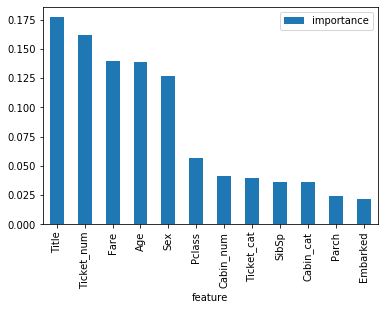

In [174]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [180]:
test=pd.read_csv('test.csv')
y_test_test = pd.DataFrame(y_test_test)
submission=pd.concat([test['PassengerId'],y_test_test],axis=1)
submission.columns=['PassengerId','Survived']
submission.to_csv("submission.csv",index=False)